<a href="https://colab.research.google.com/github/athai16/codepath-prework/blob/main/lab14_megatelco_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 14

## Outline

1. Import customer reviews
2. Create prompts for LLM (ChatGPT)
3. Summarize Customer Reviews

*Important note:*
You will use the API key from the Canvas assignment for your work, but you must NOT save it in your public GitHub repository.  It will quickly be found and used, draining my budget!

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab14_megatelco_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Install and Load Libraries

In [1]:
pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.2 MB/s eta 0:00:00


In [2]:
pip install itables

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.6/215.6 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.3 MB/s eta 0:00:00


In [3]:
import os
from openai import OpenAI
import pandas as pd
from itables import show

##Set the API Key Temporarily
Remember to remove it before saving to GitHub

In [4]:

client=OpenAI(
    api_key = "<- Get this on Canvas ->"
)

##Get Reviews

In [5]:
reviews_data = {
    'Date': ['2023-12-01', '2023-12-03', '2023-12-05', '2023-12-08', '2023-12-10', '2023-12-12', '2023-12-15', '2023-12-18', '2023-12-20', '2023-12-22'],
    'Stars': [4, 3, 5, 4, 2, 5, 3, 4, 1, 5],
    'Review': [
        "I purchased a Megatelco phone last week, and I'm impressed with its sleek design and powerful performance. The camera quality is exceptional, and the battery life is commendable. Overall, a solid 4-star experience.",
        "My Megatelco phone arrived promptly, but I've noticed some issues with the software. It tends to lag at times, affecting the user experience. Customer support was helpful, but I expected better performance. 3 stars.",
        "Megatelco offers top-notch phones! I'm thrilled with the features and the smooth interface. The camera takes stunning photos, and the battery lasts all day. 5 stars without a doubt!",
        "I've been using Megatelco phones for a while now, and they never disappoint. The latest model I purchased is no exception. Great performance, stylish design, and excellent customer service. 4 stars from a satisfied customer.",
        "Regrettably, my experience with Megatelco was not as expected. The phone had constant connectivity issues, and the support team couldn't provide a solution. Disappointed and only giving it 2 stars.",
        "Megatelco's latest phone exceeded my expectations! It's packed with innovative features, and the customer service team was quick to address a minor concern I had. Solid 5-star rating!",
        "I had a mixed experience with Megatelco. The phone's performance is decent, but I encountered some software glitches. Customer support was responsive but couldn't entirely resolve the issue. 3 stars.",
        "Megatelco phones are reliable and offer great value. The user-friendly interface, coupled with impressive features, makes them a top choice. I'm giving it 4 stars for its overall quality.",
        "My Megatelco phone started malfunctioning within a week of purchase. The touch screen became unresponsive, and customer support was unable to provide a quick solution. Unfortunately, a 1-star rating.",
        "I recently upgraded to the latest Megatelco phone, and it's fantastic! The speed, camera quality, and battery life are exceptional. The sleek design is a bonus. Easy 5 stars!"
    ]
}

# Creating the DataFrame
df = pd.DataFrame(reviews_data)
show(df)
print(df['Review'].iloc[:1])

0    I purchased a Megatelco phone last week, and I...
Name: Review, dtype: object


In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Create Prompts and Send to Model

In [6]:
review = df['Review'].values[0]
print(review)
messages = [{"role":"system","content":"Summarize the sentiment and most important points in the following user review for a phone company named Megatelco.  Format the output in a table."}]
messages.append({"role":"user", "content":review})
print(messages)

I purchased a Megatelco phone last week, and I'm impressed with its sleek design and powerful performance. The camera quality is exceptional, and the battery life is commendable. Overall, a solid 4-star experience.
[{'role': 'system', 'content': 'Summarize the sentiment and most important points in the following user review for a phone company named Megatelco.  Format the output in a table.'}, {'role': 'user', 'content': "I purchased a Megatelco phone last week, and I'm impressed with its sleek design and powerful performance. The camera quality is exceptional, and the battery life is commendable. Overall, a solid 4-star experience."}]


In [7]:
response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages = messages,
    max_tokens = 250
)

## Display Response

In [8]:
print(response.choices[0].message.content)

| Sentiment    | Positive    |
|--------------|-------------|
| Points       | - Sleek design     |
|              | - Powerful performance     |
|              | - Exceptional camera quality     |
|              | - Commendable battery life     |
|              | - Overall solid 4-star experience     |


## Create a Loop to Submit Reviews

➡️ Assignment Tasks
- Create a FOR loop to iterate through reviews
- Collect the responses in a single datafram

In [10]:
#loop and collect responses

all_responses=[]

#Iterate through the reviews
for review in reviews_data['Review']:
  # Initialize messages for each review
  messages = [{"role": "system","content": "Summarize the sentiment and most important points in the following user review for a phone company-named-Megatelco.-Format-the-output-in-a-table."}]
  messages.append({"role": "user","content": review})

# Call the create_completion method
  response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=messages,
    max_tokens=250)

  # Append the response to the list of all responses
  all_responses.append(response.choices[0].message.content)

# Create a Dataframe from the responses
df_responses = pd.DataFrame({'Response': all_responses})

# Display the DataFrame
print (df_responses)

                                            Response
0  | Sentiment   | Points                        ...
1  | Sentiment   | The user has a mixed sentiment...
2  | Sentiment   | Positive  |\n|-------------|--...
3  | Sentiment  | Points                         ...
4  | Sentiment   | Points                        ...
5  | Sentiment   | Points                        ...
6  | Sentiment  | Points                         ...
7  | Sentiment   | Positive  |\n|-------------|--...
8  | Sentiment   | Points                        ...
9  | Sentiment  | Points                         ...


## Summarize the Responses

➡️ Assignment Tasks
- Create at least two visualizations to show the most important themes and sentinment of the reviews

In [11]:
import matplotlib.pyplot as plt
from textblob import TextBlob

# Sentiment Analysis
sentiment_scores = []

for review in reviews_data['Review']:
    blob = TextBlob(review)
    sentiment_scores.append(blob.sentiment.polarity)

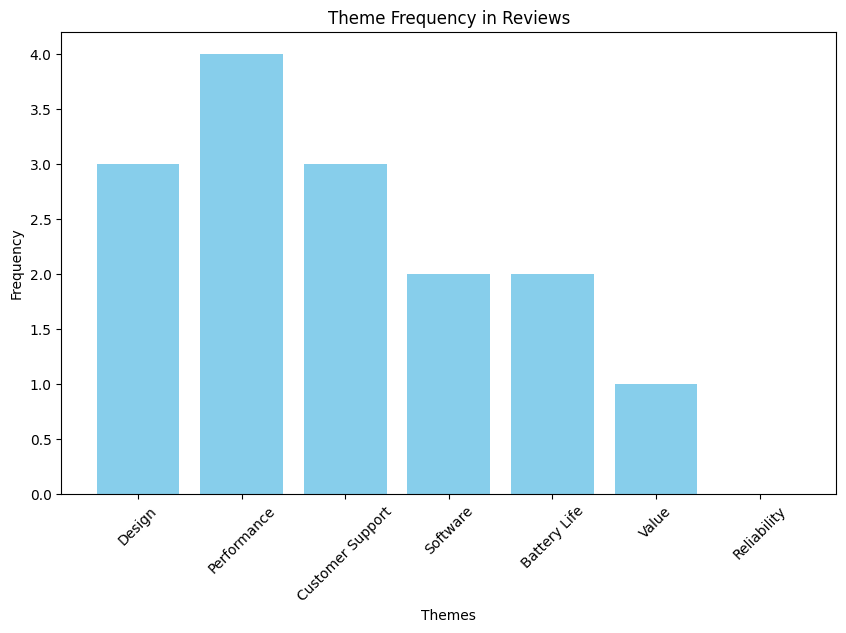

In [12]:
#themes

themes = ['Design', 'Performance', 'Customer Support', 'Software', 'Battery Life', 'Value', 'Reliability']
theme_counts = {theme: 0 for theme in themes}

for review in reviews_data['Review']:
    for theme in themes:
        if theme.lower() in review.lower():
            theme_counts[theme] += 1

plt.figure(figsize=(10, 6))
plt.bar(theme_counts.keys(), theme_counts.values(), color='skyblue')
plt.title('Theme Frequency in Reviews')
plt.xlabel('Themes')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

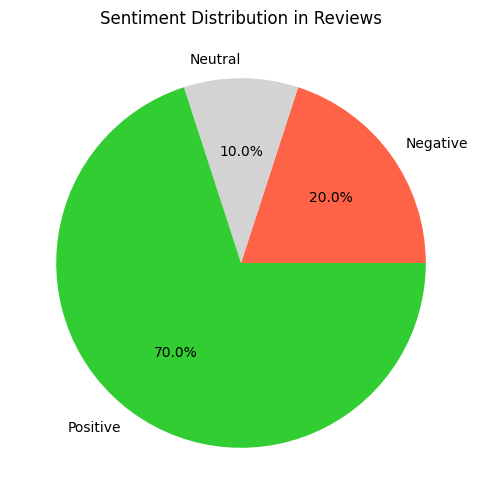

In [13]:
#sentiment frequency

sentiment_labels = ['Negative', 'Neutral', 'Positive']
sentiment_freq = [len([score for score in sentiment_scores if score < -0.1]),
                  len([score for score in sentiment_scores if -0.1 <= score <= 0.1]),
                  len([score for score in sentiment_scores if score > 0.1])]

plt.figure(figsize=(6, 6))
plt.pie(sentiment_freq, labels=sentiment_labels, autopct='%1.1f%%', colors=['tomato', 'lightgrey', 'limegreen'])
plt.title('Sentiment Distribution in Reviews')
plt.show()


In [16]:
!cp "/content/drive/MyDrive/Colab Notebooks/lab14_megatelco_reviews.ipynb" ./
!jupyter nbconvert --to html "lab14_megatelco_reviews.ipynb"

[NbConvertApp] Converting notebook lab14_megatelco_reviews.ipynb to html
[NbConvertApp] Writing 694532 bytes to lab14_megatelco_reviews.html
